In [6]:
import numpy as np
import pandas as pd
import transformers
import torch

In [7]:
data = pd.read_csv("Tweets.csv")

In [8]:
data.sample(9)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3379,568481989776564224,negative,0.7069,Can't Tell,0.3583,United,NaN,MissMcB76,NaN,0,@united no it weighed 45.5 and it was the only...,NaN,2015-02-19 10:47:22 -0800,PA,NaN
4318,567627253991735296,negative,1.0000,Bad Flight,0.3611,United,NaN,DBsViewOnThings,NaN,0,@united please see a flight attendant for what...,NaN,2015-02-17 02:10:58 -0800,NaN,Atlantic Time (Canada)
3376,568484603658420224,negative,0.7044,Customer Service Issue,0.7044,United,NaN,vina_love,NaN,0,@united I sent you a dm hours ago,NaN,2015-02-19 10:57:46 -0800,ny,Quito
3615,568232723170484224,negative,0.6633,Cancelled Flight,0.3367,United,NaN,ousoonerfanatic,NaN,0,@united @staralliance Now do the right thing a...,NaN,2015-02-18 18:16:53 -0800,"Semiahmoo, WA Soonerland",Pacific Time (US & Canada)
9335,569980561344897024,negative,1.0000,Late Flight,1.0000,US Airways,NaN,FahadHassan,NaN,0,@USAirways - HA! flight to CTL delayed! Going ...,NaN,2015-02-23 14:02:10 -0800,Washington D.C.,Eastern Time (US & Canada)
11649,567849500536152064,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,Two4Chaos,NaN,0,"@USAirways I did, but it won't help.. Can't be...",NaN,2015-02-17 16:54:05 -0800,"Scottsdale, AZ",Arizona
5246,569234280632754176,positive,0.6429,NaN,NaN,Southwest,NaN,DrMikeDevlin,NaN,0,@SouthwestAir THANK YOU. I left my iPad on a p...,NaN,2015-02-21 12:36:43 -0800,"Chicago, IL",Central Time (US & Canada)
7940,568960217976864769,negative,1.0000,Customer Service Issue,1.0000,Delta,NaN,joel_betances,NaN,0,@JetBlue I bein calling JetBlue no respond I l...,NaN,2015-02-20 18:27:41 -0800,new york,NaN
9776,569671485930876928,negative,1.0000,Customer Service Issue,0.3455,US Airways,NaN,weezerandburnie,NaN,0,@USAirways @AmericanAir how is it possible tha...,NaN,2015-02-22 17:34:00 -0800,Belle MO,NaN


In [9]:
data.tail(9)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [10]:
data.isnull()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,False,False,False,True,True,False,True,False,True,False,False,True,False,True,False
1,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,False,False,False,True,False,False,True,False,True,False,False,True,False,True,True
14636,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True
14637,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True
14638,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


In [11]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [13]:
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [14]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
print("No of duplicates:")
print(data.duplicated().sum())
data = data.drop_duplicates()
print("No of duplicates after:")
print(data.duplicated().sum())

No of duplicates:
36
No of duplicates after:
0


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
# Download the 'punkt' resource
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Remove special characters, numbers, and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and apply stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing to your text data
data['cleaned_text'] = data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica realli big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,americanair thank got differ flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,americanair leav minut late flight warn commun...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,americanair pleas bring american airlin blackb...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),americanair money chang flight answer phone su...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform your cleaned text data into numerical features
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])
print(X)


  (0, 3656)	0.7801159552510394
  (0, 4763)	0.6256349545563756
  (1, 4348)	0.5803821325155215
  (1, 1568)	0.3071565627316084
  (1, 987)	0.45151860284963297
  (1, 47)	0.3927853286081626
  (1, 3225)	0.38189333005076254
  (1, 4763)	0.25459683344706346
  (2, 4570)	0.3523574946188278
  (2, 175)	0.341539689886084
  (2, 4358)	0.3192075931416364
  (2, 2849)	0.2790200677962609
  (2, 2666)	0.41107739547620054
  (2, 2811)	0.4761310936611927
  (2, 4511)	0.3098888796173707
  (2, 4763)	0.2961968759679016
  (3, 3457)	0.3577514302373064
  (3, 2524)	0.2596276396340922
  (3, 153)	0.16940841334023587
  (3, 1589)	0.30491508395870787
  (3, 1959)	0.34126287838404473
  (3, 1489)	0.2884265321054462
  (3, 2955)	0.3859387958084911
  (3, 464)	0.35148277375683495
  (3, 78)	0.3742399820905681
  :	:
  (14601, 590)	0.43378958506496257
  (14601, 96)	0.28750502195694055
  (14601, 3214)	0.28653211412912366
  (14602, 4207)	0.43344847341608816
  (14602, 988)	0.5127029711096661
  (14602, 144)	0.16516955021156957
  (14602, 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['airline_sentiment'], test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7915097569325573


In [20]:
# Calculate the distribution of sentiment
sentiment_distribution = data['airline_sentiment'].value_counts()

# Most common reasons for negative sentiments
common_negative_reasons = data[data['airline_sentiment'] == 'negative']['negativereason'].value_counts()

# Analyze the impact of airline sentiment confidence
data['airline_sentiment_confidence'].groupby(data['airline_sentiment']).mean()

# Explore the relationship between sentiment and airline
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack()


In [21]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica realli big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,americanair thank got differ flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,americanair leav minut late flight warn commun...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,americanair pleas bring american airlin blackb...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),americanair money chang flight answer phone su...


In [22]:
sentiment_by_airline

airline_sentiment,negative,neutral,positive
airline,,,
American,1941,455,327
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [23]:
from gensim.models import Word2Vec

# Tokenize the cleaned text data
tokenized_data = data['cleaned_text'].apply(lambda x: x.split())

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, sg=0)

# Find similar words
similar_words = w2v_model.wv.most_similar('flight', topn=5)
print("Words similar to 'flight':", similar_words)


Words similar to 'flight': [('flightlat', 0.9870590567588806), ('flightat', 0.981305718421936), ('tomorrow', 0.9808810949325562), ('rebook', 0.9709263443946838), ('flightl', 0.9695472717285156)]


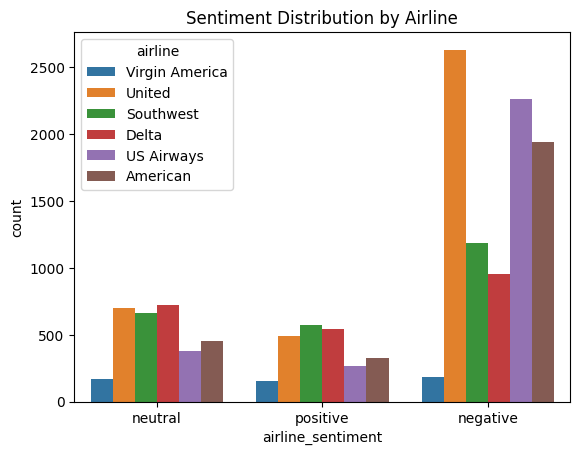

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='airline_sentiment', hue='airline')
plt.title("Sentiment Distribution by Airline")
plt.show()


In [25]:
import plotly.express as px

fig = px.scatter(data, x='retweet_count', y='airline_sentiment', color='airline_sentiment')
fig.update_layout(title="Interactive Scatter Plot")
fig.show()


In [26]:
import plotly.express as px

fig = px.box(data, x='airline', y='airline_sentiment_confidence', color='airline_sentiment')
fig.update_layout(title="Interactive Box Plot by Airline and Sentiment")
fig.show()


In [27]:
import plotly.express as px

fig = px.bar(data, x='airline', y='tweet_location', color='airline_sentiment',
             labels={'count': 'Sentiment Count'},
             title="Sentiment Distribution by Airline")
fig.show()


In [28]:
import plotly.express as px

fig = px.sunburst(data, path=['airline', 'airline_sentiment'], values='airline_sentiment_confidence',
                 title="Sentiment Breakdown by Airline")
fig.show()


In [29]:
import pandas as pd
import plotly.express as px

# Select numeric columns from your dataset
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation = numeric_data.corr()

# Create an interactive heatmap to visualize correlations
fig = px.imshow(correlation, x=correlation.columns, y=correlation.columns, color_continuous_scale='Viridis',
                labels=dict(color="Correlation"))
fig.update_layout(title="Correlation Heatmap for Numeric Columns")
fig.show()
